# Model Prediction Improvement

# 1. Introduction

There are several methods that can help improve the prediction performance of models. Here are some commonly used techniques:
   
1. **Data Augmentation**: This refers to techniques that increase the amount of data by adding slightly modified copies of already existing data. For example, in image processing, these techniques could include rotation, scaling, flipping, etc. In text data, it can include methods like back translation or synonym replacement.


2. **Data Cleaning**: This involves taking care of missing values (by either filling them in based on existing data, or removing the data points entirely), and handling outliers (which might distort the training of the model).


3. **Feature engineering**: This is the process of creating new features from existing data that can help improve model performance. This can involve transformations of existing features, creating interaction features, or any other kind of data manipulation that creates new, useful input for the model.


4. **Model Selection**: This involves choosing the right machine learning algorithm for your specific problem. This could be a linear regression model, a decision tree, a neural network, etc. The choice depends on the nature of your data and the problem you're trying to solve.


5. **Hyperparameter tuning**: Hyperparameters are parameters that are not learned from the data but are set before the training process. Examples are learning rate, number of layers in a neural network, number of clusters in a K-means clustering, etc. Tuning these can often significantly improve performance. Techniques for hyperparameter tuning include grid search, random search, and more advanced methods like Bayesian optimization.


6. **Cross-validation**: This is a resampling procedure used to evaluate the performance of a model on a limited data sample. The dataset is partitioned into 'k' equally sized folds, and the model is trained on 'k-1' folds, and the remaining fold is used for testing. This process is repeated 'k' times so that we obtain a model performance score for each fold. It helps in assessing how the results of a statistical analysis will generalize to an independent data set.


7. **Regularization**: This is a technique used to prevent overfitting, which is when a model performs well on the training data but poorly on unseen data. Regularization works by adding a penalty term to the loss function that increases as the complexity of the model increases.


8. **Ensemble your model**: This refers to combining different models to improve overall performance. Techniques include Bagging (e.g., Random Forest), Boosting (e.g., Gradient Boosting, XGBoost), and Stacking.


9. **Suitable Evaluation Metrics**: This means identifying appropriate ways to measure the success or performance of your model. This can vary depending on the type of problem you're trying to solve. For example, in a binary classification problem, you might use accuracy, precision, recall, or the AUC-ROC score. In a regression problem, you could use metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).


Since we have already covered data cleaning, feature engineering, and suitable evaluation metrics in the previous sections, our attention in this section will shift to other topics, including data augmentation, model selection, ensemble model, regularization, cross-validation and hyperparameter tuning.

# 2. Preparation

### 2.1 Import library

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### 2.2 Load and explore the dataset

Here we chose the digits dataset, which can be loaded directly using Scikit-learn.

Digit dataset is a dataset of 8x8 grayscale images of handwritten digits. It's a subset of the MNIST dataset, which is a larger set of 28x28 pixel images. Each image in the Digits dataset is represented as a flat array with 64 features, each representing one pixel (8x8). The target is the digit that the image represents, from 0-9.



In [115]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Create a dataframe
# "digits.data" contains the features and "digits.target" contains the target
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                  columns= digits['feature_names'] + ['target'])

# Separate the features (X) and the target (y)
X = df[digits['feature_names']]
y = df['target']

In [116]:
# Display the dataframe
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

As we can see, The dataset does NOT contain any NaN values.

In [118]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


# 3. Data Augmentation

In this code, we loop over each image in the dataset, rotate it, and add it to the augmented dataset. Then, we combine the original and augmented datasets. Note that because the models and other functions we're using require 2D input, we need to flatten our images after augmenting them.

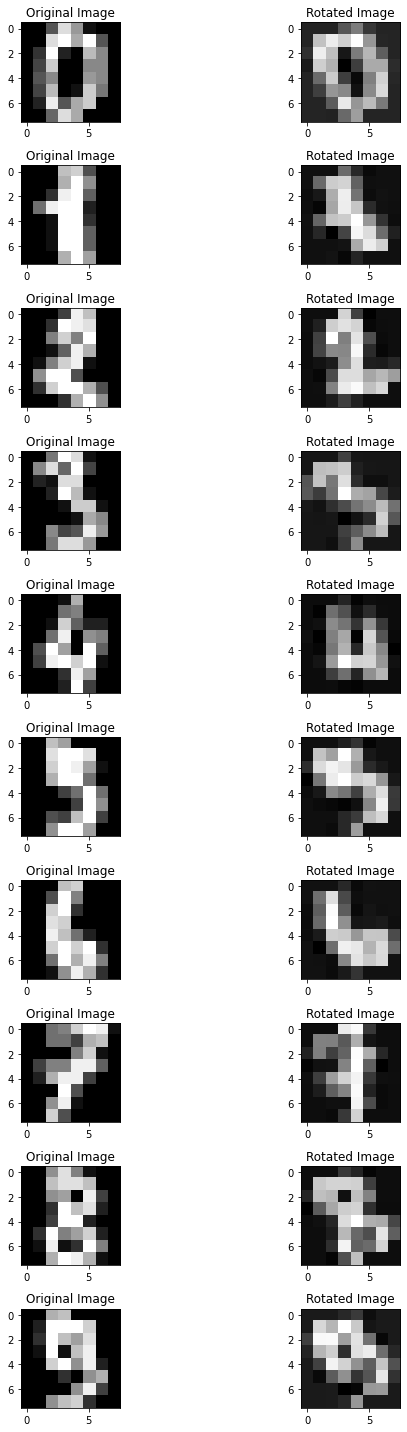

In [119]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from sklearn.datasets import load_digits
import numpy as np

# load the data
digits = load_digits()
X = digits.images
y = digits.target

# perform augmentation for each image and add to original dataset
augmented_X = np.array([rotate(img, 30, reshape=False) for img in X])

# combine original and augmented datasets
X_combined = np.vstack((X, augmented_X))
y_combined = np.hstack((y, y))

# plot some original images and their rotated versions
n = 10  # number of pairs to display
fig, ax = plt.subplots(n, 2, figsize=(10, 20))

for i in range(n):
    ax[i, 0].imshow(X[i], cmap='gray')
    ax[i, 0].set_title('Original Image')
    
    ax[i, 1].imshow(augmented_X[i], cmap='gray')
    ax[i, 1].set_title('Rotated Image')

plt.tight_layout()
plt.show()

# 4. Data Pre-processing

The digits dataset from sklearn is a clean dataset, meaning it `doesn't have missing values`, it `doesn't contain categorical features` that need to be encoded, and it `doesn't have obvious outliers`. Therefore, some pre-processing steps like handling missing values, encoding categorical variables, or outlier treatment are not applicable in this case.

# 5. Feature Engineering

The digits dataset is a set of 8x8 pixel images, and each pixel in the image is a feature. There are a total of 64 features for each image. These features are already in a form that's suitable for machine learning models, so it's typically not necessary to do additional feature engineering.

# 6. Model Selection

In this code, we load the digits dataset, split it into training and testing sets, and then iterate over four different models: K-Nearest Neighbors, Support Vector Machine, Random Forest, and Multi-Layer Perceptron. For each model, we train it on the training data, make predictions on the test data, calculate the accuracy, and print a classification report.

The classification report provides more detailed metrics such as precision, recall, and F1-score for each class. It is useful for understanding how well the model performs for individual digits.

After evaluating the models, the code also visualizes some example predictions for the first few test samples to give you an idea of how well the models are performing on specific digits.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Define a list of model names and corresponding classifier objects
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Multi-Layer Perceptron', MLPClassifier(random_state=42))
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Loop over the models
for model_name, model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Add the results to the DataFrame
    results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

The `sort_values` function is used to sort the DataFrame in descending order based on the 'Accuracy' column. The `reset_index(drop=True)` function is used to reset the index of the DataFrame after sorting, so the index starts from 0 without any gaps.

Now, the `results_df` DataFrame will be ranked based on the accuracy of each model, with the highest accuracy at the top.

In [121]:
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results_df.head()

,Model,Accuracy
0,Support Vector Machine,0.986111
1,K-Nearest Neighbors,0.983333
2,Multi-Layer Perceptron,0.983333
3,Random Forest,0.972222


Based on the evaluation results, the Support Vector Machine (SVM) achieved the highest accuracy among the models, making it the selected model for the digits dataset.

# 7. Cross-validation and Hyperparameter tuning

This imports matplotlib and seaborn, which are libraries used for data visualization in Python.

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

We define a grid of hyperparameter ranges and perform grid search cross-validation on our model. We specify `return_train_score=True` to return training scores for each cross-validation fold.

In [123]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(classifier, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, gamma=0.001),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             return_train_score=True)

We get the cross-validation results from `grid_search`. These results include information about the mean test scores (`mean_test_score`) and standard deviations of the test scores (`std_test_score`) for each hyperparameter combination.

In [124]:
cv_results = grid_search.cv_results_
scores_mean = cv_results['mean_test_score']
scores_sd = cv_results['std_test_score']

We reshape the mean test scores and standard deviations into a 2D array format to match the grid of hyperparameters. Each row corresponds to a value of 'C', and each column corresponds to a value of 'gamma'.

In [125]:
scores_mean = np.array(scores_mean).reshape(len(param_grid['C']), len(param_grid['gamma']))
scores_sd = np.array(scores_sd).reshape(len(param_grid['C']), len(param_grid['gamma']))

We create pandas dataframes for the mean test scores and standard deviations. The rows and columns of these dataframes correspond to the 'C' and 'gamma' values. The dataframes will be used to create the heatmap.

In [126]:
df = pd.DataFrame(scores_mean, index=param_grid['C'], columns=param_grid['gamma'])
df_sd = pd.DataFrame(scores_sd, index=param_grid['C'], columns=param_grid['gamma'])

We create a new figure with a specified size. We then use seaborn's `heatmap` function to create a heatmap from the mean test scores dataframe. The `annot=True` option indicates that we want to print the individual scores on the heatmap. `fmt=".3f"` specifies that these scores should be formatted as floating point numbers with three decimal places. `linewidths=.5` sets the width of the lines that will divide each cell. cmap='viridis' sets the color map of the heatmap to 'viridis'. The labels for the x and y axes and the title for the plot are set using `plt.xlabel`, `plt.ylabel`, and `plt.title` respectively. Finally, `plt.show()` is used to display the plot.

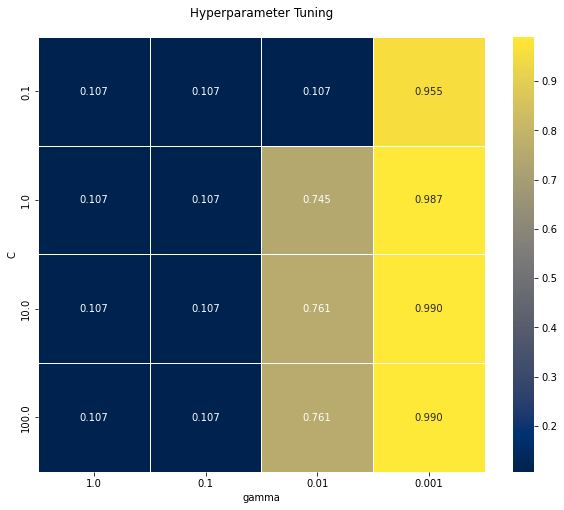

In [127]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt=".3f", linewidths=.5, cmap='cividis')
plt.title('Hyperparameter Tuning', pad=20)
plt.ylabel('C')
plt.xlabel('gamma')
plt.show()

In [128]:
best_params = grid_search.best_params_
best_params

{'C': 10, 'gamma': 0.001}

# 8. Train the Model with the Best Parameters:

We reinitialize our model with the best hyperparameters and fit it on our training data. This trains the model to find patterns linking the features (X_train) to the targets (y_train).



In [129]:
# Train the model with the best parameters
classifier = SVC(C=best_params['C'], gamma=best_params['gamma'])
classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

# 9. Make Predictions and Evaluate the Model

We use our trained model to predict the targets of our test data. These predictions will be compared to the actual targets to evaluate the model's performance.

In [130]:
# Make predictions using the trained model
y_pred = classifier.predict(X_test)

We use accuracy_score to evaluate the performance of our model. Accuracy is the proportion of correct predictions among the total number of predictions.

In [131]:
# Evaluate the model
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Model accuracy:  0.9888888888888889


# 10. Ensemble

We create a second model, a Random Forest Classifier, and train it on our training data. Then we average the predictions from the SVC and RandomForest models to create ensemble predictions. This is a simple form of ensemble learning and can potentially lead to better performance.

In [133]:
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
ensemble_pred = (y_pred + rf_y_pred) / 2

In [110]:
# Ensemble your model
# Train a RandomForestClassifier as a second model
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
# Make predictions using the second model
rf_y_pred = rf.predict(X_test)
ensemble_pred = (y_pred + rf_y_pred) / 2

# 11. Evaluate the Ensemble Model

We evaluate the performance of our ensemble model in the same way we evaluated the individual models. We round the ensemble predictions before calculating accuracy because the average of the individual model predictions might not be an integer, and the actual targets are integers.

In [141]:
print("Ensemble model accuracy: ", accuracy_score(y_test, ensemble_pred))


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets